In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

In [2]:
#loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#analyzing the data
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#training the data
X_train[0]
y_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

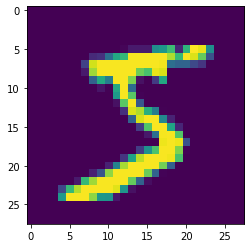

In [6]:
plt.imshow(X_train[0])

In [7]:
#preprocessing the data
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
#creating the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
#training the model
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2643 - accuracy: 0.9454 - val_loss: 0.1076 - val_accuracy: 0.9700
Epoch 2/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0864 - val_accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0857 - val_accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.1066 - val_accuracy: 0.9754
Epoch 5/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0289 - accuracy: 0.9914 - val_loss: 0.0943 - val_accuracy: 0.9789


In [13]:
#testing the model
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09425853937864304, 0.9789000153541565]


In [14]:
#predicting the model
prediction = model.predict(X_test[:4])
print(prediction)

[[4.9950284e-13 1.8421230e-17 1.3389667e-08 1.9648932e-07 1.8434234e-17
  5.1799830e-15 1.6489989e-21 9.9999976e-01 1.8500926e-12 1.1136964e-08]
 [8.8104849e-13 3.8003168e-12 1.0000000e+00 5.7173423e-14 1.3460623e-16
  1.6809931e-18 5.4742161e-10 3.1447148e-19 9.2269565e-16 6.8867392e-19]
 [1.1622749e-11 9.9999988e-01 7.4071393e-09 1.2179366e-16 4.2721027e-08
  1.5753099e-12 1.3442959e-10 3.2262598e-08 6.6224565e-08 7.7463814e-15]
 [1.0000000e+00 1.6806469e-18 3.8556033e-11 3.0773832e-17 3.4110893e-15
  1.5264132e-14 2.3986412e-12 1.1943861e-13 3.2585989e-11 2.4344565e-10]]


In [16]:
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
#saving the model
model.save("model.h5")

In [18]:
#testing the saved model
model=load_model("model.h5")

In [20]:
#prediction
img = Image.open("testdata.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

0    8
Name: Label, dtype: int64
